In [98]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct
from scipy.fftpack import idct

Documentación:

https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.fftpack.dct.html

https://en.wikipedia.org/wiki/Discrete_cosine_transform#DCT-II

In [131]:
pi = np.pi
cos = np.cos

In [132]:
# Forma manual de recuperar los puntos originales a partir de los coeficientes. Es correcta?
# Los coeficientes son las amplitudes?
def manual_approximation(t, coeffs):
    accum = np.ones(t.shape[0]) * coeffs[0]
    for i in range(1, len(coeffs)):
        accum += coeffs[i] * np.cos(2*pi*i*t)
    return accum / len(coeffs)

In [133]:
def cosine(t):
    f=1
    return cos(2*pi*f*t)

In [188]:
# times and values para coseno de frecuencia 1
ts = np.linspace(0, 1.0, 7)[:-1]
ys = cosine(ts)

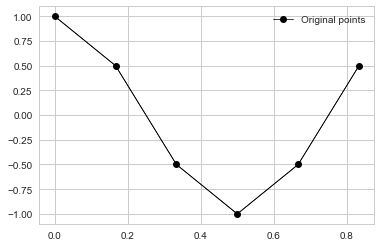

In [189]:
sns.set(style="whitegrid")
plt.plot(ts, ys, color="black", linewidth=0.75)
plt.plot(ts, ys, marker="o", color="black", linewidth=0.75, label="Original points")
plt.legend()
plt.show()

# DCT approximation

Al final me confundí. DCT sí permite especificar la cantidad de coeficientes. En este caso elijo n=2. Posteriormente
obtengo valores de los coeficientes que no entiendo. Hubiera esperado que fueran [0., 1.], porque la función es un coseno con f=1.
También está la opción de aplicar una normalización ortonormal, que no entiendo del todo el uso

In [190]:
dct_coeffs = dct(ys, n=2)
print dct_coeffs

[ 3.          0.70710678]


Genero 20 puntos usando IDCT (caja negra) y los coefficients que acabo de calcular

In [174]:
idct_ys = idct(dct_coeffs, n=20)
idct_ts = np.linspace(0, 1.0, idct_ys.shape[0])

Alternativamente, hago una aproximación manual (porque imagino que funciona de esta manera o similar). Uso los coefficientes para generar términos de la pinta res += A * cos(2 pi f t). Es decir, los uso como amplitudes. Es correcto eso?

In [171]:
manual_ys = manual_approximation(ts, dct_coeffs)

Ninguna de las 2 alternativas me sirve para recuperar los puntos originales: 
Los coeficientes que devuelve la función dct son las amplitudes de las frecuencias según los índices? O son otra cosa?

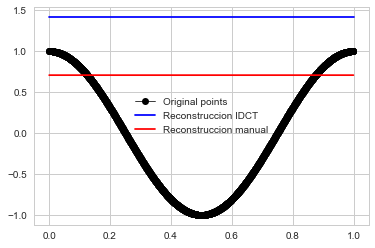

In [172]:
sns.set(style="whitegrid")
plt.plot(ts, ys, color="black", linewidth=0.75)
plt.plot(ts, ys, marker="o", color="black", linewidth=0.75, label="Original points")
plt.plot(idct_ts, idct_ys, color="blue", label="Reconstruccion IDCT")
plt.plot(ts, manual_ys, color="red", label="Reconstruccion manual")
plt.legend()
plt.show()

## Corroborar ecuaciones

https://www.tu-ilmenau.de/fileadmin/public/mt_ams/GrundlagenDerVideotechnikb/Vorlesung/WS_2017-18/06_16-11-28DCT_-_English.pdf

In [452]:
def cosine(t):
    f=1
    return cos(2*pi*f*t)

In [453]:
def manual_dct(ts, ys):
    n = ys.shape[0]
    res = np.array([])
    for k in range(n):
        acum = 0.
        s = np.sqrt(0.5) if (k==0) else 1.
        for i in range(n):
            acum += s * ys[i] * cos((pi * (i + 0.5) * k) / n )
        res = np.append(res, [acum])
        
    # FUNCIONA PARA EL TERMINO INDEPENDIENTE. FUNCIONA PARA LOS DEMÁS COEFICIENTES?
    return np.sqrt(2./n) * res
    
    # Without ortho normalization
    #return 2*np.sum(ys)

In [462]:
def manual_idct(coeffs):
    n = coeffs.shape[0]
    res = np.array([])
    for i in range(n):
        acum = 0
        for k in range(n):
            s = np.sqrt(0.5) if (k==0) else 1.
            acum += s * coeffs[k] * cos((pi * (i + 0.5) * k) / n)
        res = np.append(res, [acum])
    return np.sqrt(2./n) * res

In [542]:
def approximate_with_dct(coeffs, n_instances):
    n = coeffs.shape[0]
    res = np.array([])
    for i in range(n_instances):
        acum = 0
        for k in range(n):
            s = np.sqrt(0.5) if (k==0) else 1.
            #acum += s * coeffs[k] * cos((pi * (i + 0.5) * k) / n)
            acum += s * coeffs[k] * cos((pi * (i + 0.5) * k) / n_instances)
        res = np.append(res, [acum])
    return np.sqrt(2./n) * res

In [576]:
ts_original = np.linspace(0, 2, 100)
ys_original = cosine(ts_original)

In [589]:
#ts = np.linspace(0, 0.5, 5)[:-1]
ts = np.linspace(0, 1.0, 5)[:-1]
#ts = np.linspace(0, 1.0, 100)[:-1]
ys = cosine(ts)
coeffs = dct(ys, norm="ortho")

In [590]:
print "Coeffs: "
print coeffs
print "\n"
print "Manually computed coefficients: "
print manual_dct(ts, ys) 
print "\n"
print "Original values: "
print ys
print "\n"
print "Manually re-obtaining the original points: "
print manual_idct(coeffs)
print "\n"

Coeffs: 
[ -5.55111512e-17   9.23879533e-01   1.00000000e+00  -3.82683432e-01]


Manually computed coefficients: 
[ -9.18485099e-17   9.23879533e-01   1.00000000e+00  -3.82683432e-01]


Original values: 
[  1.00000000e+00   6.12323400e-17  -1.00000000e+00  -1.83697020e-16]


Manually re-obtaining the original points: 
[  1.00000000e+00   0.00000000e+00  -1.00000000e+00  -1.17756934e-16]




In [591]:
computed_ys = approximate_with_dct(coeffs, 200)
#computed_ts = np.linspace(0, .5, computed_ys.shape[0] + 1)[:-1]
computed_ts = np.linspace(0, 1., computed_ys.shape[0] + 1)[:-1]

In [596]:
# EXTENSIONS
computed_ts2 = np.linspace(1, 2., computed_ys.shape[0] + 1)[:-1]
computed_ys2 = np.flip(computed_ys,0)

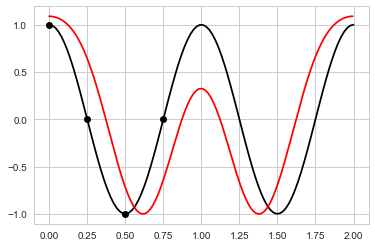

In [597]:
sns.set(style="whitegrid")
plt.plot(ts, ys, marker="o", linestyle="None", color="black", label="Original values")
plt.plot(ts_original, ys_original, color="black")
plt.plot(computed_ts, computed_ys, color="red")
plt.plot(computed_ts2, computed_ys2, color="red")
plt.show()